## Regression


<br><br>

### Introduction

<br>
<img width="60%" class="imgright" src="../images/house_prices.webp" srcset="../images/house_prices_800w.webp 800w,../images/house_prices_700w.webp 700w,../images/house_prices_600w.webp 600w,../images/house_prices_500w.webp 500w,../images/house_prices_400w.webp 400w,../images/house_prices_350w.webp 350w,../images/house_prices_300w.webp 300w" alt="House Prices" />

Most of the other chapters of our machine learning tutorial with Python are dealing with classification problems. Classification is the task of predicting a discrete class label, whereas regression is the task of predicting a continuous quantity. Some algorithms can be used for both classification and regression, if we apply small modifications: Decision trees and artificial neural networks. 

The topics of this chapter will be regression, but what are typcial regression problems?

Typcial regression problems are for example the prediction of

- house prices
- car prices
- exchange rates
- the price of shares

This chapter of our regression tutorial will start with the LinearRegression class of ```sklearn```. 

Yet, the bulk of this chapter will deal with the ```MLPRegressor``` model from ```sklearn.neural network```. It is a Neural Network model  for regression problems. The name is an acronym for multi-layer perceptron regression system. MLP or multi-layer perceptron is an artificial neural network (ANN), which consists of a minimum of three layers: 

- an input layer, 
- one or more hidden layers and 
- an output layer.

Yet, before we start with the ```MLPRegressor```, we will have a look at simpler models.


### Simple Example with Linear Regression

```LinearRegression``` from the ```sklearn```module is an ordinary least 
squares Linear Regression.

LinearRegression fits a linear model with coefficients $w = (w_1, …, w_p)$ to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

Linear regression is about finding a line of the form 

$$y= a \cdot x + b$$

where x is the explanatory variable and y is the dependent variable. The slope of the line is a, and b is the intercept, which corresponds to the value of y if y is equal to 0. 

Our first example uses the data of the file ```regr_example_data1.csv```.
We will first load the data and separate the data in the X and y values:

In [1]:
import numpy as np

data = np.loadtxt("data/regr_example_data1.csv", delimiter=",")
data[:4]

array([[0. , 2.8],
       [0.2, 4.8],
       [0.4, 4.4],
       [0.6, 5.6]])

In [2]:
X = data[:, 0]
y = data[:, 1]

The data was artificially created. When we created the data, we modified the data created by $4.5 \cdot x + 2.8$. This has been the ```ideal```data and we name it in the following plot as y_opt:

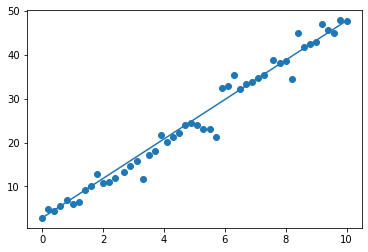

In [3]:
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots()

    y_opt = 4.5 * X + 2.8
    ax.scatter(X, y)
    ax.plot(X, y_opt)

We will use now ```LinearRegression``` from ```sklearn``` to calculate a linear approximation. Of course, we pretend not to know the equation  $4.5 \cdot x + 2.8$ with which we had created the test data. We fit the values ```X``` to ```y``` by using the ```fit``` function:

In [4]:
from sklearn.linear_model import LinearRegression
X = X.reshape(X.shape[0], 1)
reg = LinearRegression().fit(X, y)

We can use the method ```predict``` which uses the linear model to predict result. We can apply it to the X values to see, if it works well:

In [5]:
y_predict = reg.predict(X)
y_predict[-10:]

array([39.6799633 , 40.60471101, 41.52945872, 42.45420642, 43.37895413,
       44.30370183, 45.22844954, 46.15319725, 47.07794495, 48.00269266])

In [6]:
help(reg.predict)

Help on method predict in module sklearn.linear_model._base:

predict(X) method of sklearn.linear_model._base.LinearRegression instance
    Predict using the linear model.
    
    Parameters
    ----------
    X : array_like or sparse matrix, shape (n_samples, n_features)
        Samples.
    
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.



We get also the value for the intercept and the coefficient:

In [7]:
reg.intercept_, reg.coef_

(1.7653073394495422, array([4.62373853]))

This means, we can write the straight line equation calculated by the regression:

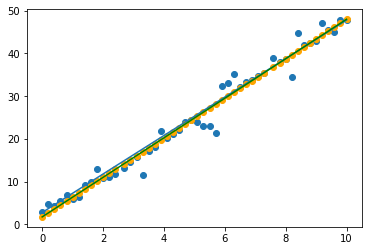

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

y_opt = X * 4.5 + 2.8
y_reg = X *reg.coef_[0] + reg.intercept_
ax.scatter(X, y)
ax.scatter(X, y_predict, color="orange")
ax.plot(X, y_opt)
ax.plot(X, y_reg, color="green")

### Linear Regression with scipy.stats.linregress

We can also calculate linear regression with the linregress function from the scipy.stats module.

We can use again the data from before and use now linregress:


In [9]:
# we have to reshape X from two dimensional to one-dimensional
X = X.reshape(-1)

In [10]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(X, y)

We can visualize the data and the results:

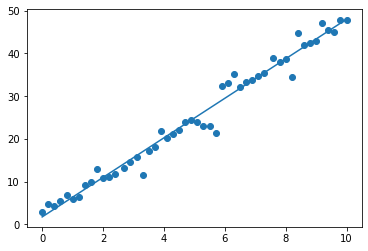

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(X, y)
ax.plot(X, X*slope + intercept)

## Another Example

We will use some simple artificial data, which gives the price of a car (same model and type) and the age.
The file is called ```car_prices.txt``:

In [12]:
from scipy import stats
import numpy as np

data = np.loadtxt("data/car_prices_linear.txt")
years = data[:,0]
prices = data[:,1]
slope, intercept, r_value, p_value, std_err = stats.linregress(years, prices)


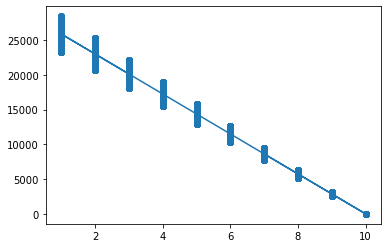

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(years, prices)
ax.plot(years, years*slope + intercept)

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

from sklearn import datasets, linear_model, metrics


data_sets = train_test_split(years.reshape(-1,1), 
                             prices.reshape(-1,1), 
                             train_size=0.8,
                             test_size=0.2, 
                             random_state=42)

train_data, test_data, train_targets, test_targets = data_sets
train_data[-5:], train_targets[-5:]

(array([[10.],
        [ 4.],
        [ 7.],
        [ 7.],
        [ 3.]]),
 array([[    0.  ],
        [18432.36],
        [ 7829.35],
        [ 9042.8 ],
        [18381.84]]))

In [15]:
regr = linear_model.LinearRegression()
regr.fit(train_data, train_targets)
regr.predict(train_data)


array([[25850.95101352],
       [17234.9152252 ],
       [ 8618.87943687],
       ...,
       [ 8618.87943687],
       [ 8618.87943687],
       [20106.92715464]])

In [16]:
train_targets[:20]

array([[23978.3 ],
       [17302.83],
       [ 8992.9 ],
       [11226.09],
       [24430.87],
       [ 6158.63],
       [    0.  ],
       [ 5421.7 ],
       [14040.26],
       [20246.37],
       [    0.  ],
       [    0.  ],
       [27107.66],
       [ 3108.44],
       [ 6203.36],
       [    0.  ],
       [18620.77],
       [    0.  ],
       [ 5398.64],
       [14905.14]])

### Non-linear Example

We use a file ```car_prices.txt```, where each line contains a sample with the age and the value of a car:

```
8 5332.82
3 12079.80
9 2754.36
4 14382.52
```

In [17]:
from scipy import stats
import numpy as np

data = np.loadtxt("data/car_prices.txt")
years = data[:, 0]
prices = data[:, 1]

data_sets = train_test_split(years.reshape(-1,1), 
                             prices, 
                             train_size=0.8,
                             test_size=0.2, 
                             random_state=42)
print(years.shape)
train_data, test_data, train_targets, test_targets = data_sets

(4999,)


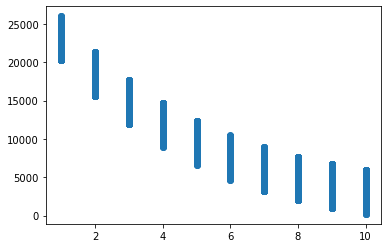

In [18]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.scatter(years, prices)

In [19]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', 
                   alpha=1e-5,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(5, 2), random_state=24)
clf.fit(train_data, train_targets)
res = clf.predict(train_data)

res


array([ 8769.29762279,  2866.74419242,  3994.62057336, ...,
        7378.24971619, 22411.61185359,  5122.49695431])

An explanation of the parameters of MLPRegressor comes further down in this chapter.

In [20]:
predictions = clf.predict(train_data)
predictions[:10]

array([ 8769.29762279,  2866.74419242,  3994.62057336, 15590.45473819,
        6250.37333525,  3994.62057336, 19001.03329589,  2866.74419242,
        8769.29762279,  6250.37333525])

In [21]:
train_targets[:10]

array([ 9416.01,  4320.32,  4813.04, 15306.8 ,  5293.85,  3922.08,
       19262.51,  3427.23,  9502.91,  8615.61])

### Create Regression Test Data

In [22]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
data, targets = make_regression(n_samples=100, 
                                n_features=1, 
                                noise=0.1)

data[:5]

array([[-0.41554553],
       [-1.21306565],
       [-0.05002406],
       [-1.90734233],
       [-0.99425594]])

In [23]:
from sklearn import datasets


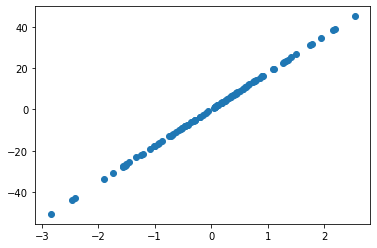

In [24]:
plt.scatter(data, targets)
plt.show()

In [25]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
data, targets = make_regression(n_samples=100, 
                                n_features=3, 
                                #shuffle=True,
                                noise=0.1)

data[:5]

array([[ 2.05842506,  1.96959305, -0.40855792],
       [-0.09740499, -0.33782072,  1.26142418],
       [-1.44163768, -2.41574306,  1.47947872],
       [ 0.43487143,  0.58463353,  1.26245642],
       [-0.27633259,  0.73113988,  0.12779181]])

In [26]:
import pandas as pd
data_df = pd.DataFrame(data)
data_df.insert(len(data_df.columns),
               column="result",
               value=targets)
data_df.columns = "blue", "green", "red", "result"

data_df.head(5)

,blue,green,red,result
0,2.058425,1.969593,-0.408558,362.012719
1,-0.097405,-0.337821,1.261424,-10.546767
2,-1.441638,-2.415743,1.479479,-317.325555
3,0.434871,0.584634,1.262456,121.502942
4,-0.276333,0.731140,0.127792,40.078954


In [27]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,
                             targets,
                             test_size=0.30,
                             random_state=42)

data_train, data_test, targets_train, targets_test = data_sets

clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(3, 1), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(data_train, targets_train)
clf.predict(data_train)

array([  71.91688932,   71.91688932, -213.04741336,   71.91688932,
         71.91688932,   71.91688932,   71.91688932,  -49.0385247 ,
         71.91688932,   71.91688932, -213.04741336,   71.91688932,
         71.91688932,   71.91688932,   71.91688932,   71.91688932,
         71.91688932,   71.91688932,   71.91688932,   71.91688932,
         71.91688932,   71.91688932,   71.91688932,   71.91688932,
         71.91688932, -213.04741336,   71.91688932,   71.91688932,
         71.91688932,   71.91688932,   71.91688932,   71.91688932,
         71.91688806,   71.91688932, -213.04741336,   71.91688932,
        -89.51408466,  -75.30578295, -213.04741336, -102.85736291,
       -213.04741336,   71.91688932, -213.04741336, -213.04741336,
        -93.55561119, -213.04741336,   71.91688393,   71.91688932,
         71.91688932,   71.91688932, -213.04741336, -213.04741336,
       -213.04741336,   71.91688932,   71.91688932, -213.04741336,
         71.91688932, -213.04741336, -213.04741336,   71.91688

### California-Housing-Dataset

<img width="60%" class="imgright" src="../images/california_housing.webp" srcset="../images/california_housing_800w.webp 800w,../images/california_housing_700w.webp 700w,../images/california_housing_600w.webp 600w,../images/california_housing_500w.webp 500w,../images/california_housing_400w.webp 400w,../images/california_housing_350w.webp 350w,../images/california_housing_300w.webp 300w" alt="California Housing" />

Now, we will use a dataset derived from the 1990 U.S. census. The data is solely from California. 
The data is organized as one row per census block group. 
A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

The dataset contains 20640 samples. Each sample with 8 numeric, predictive attributes and the target value. 

The attributes are:

- MedInc:        median income in block
- HouseAge:      median house age in block
- AveRooms:      average number of rooms
- AveBedrms:     average number of bedrooms
- Population:    block population
- AveOccup:      average house occupancy
- Latitude:      house block latitude
- Longitude:     house block longitude

This dataset was obtained from the StatLib repository:
http://lib.stat.cmu.edu/datasets/

It can be downloaded via a sklearn function:

```learn.datasets.fetch_california_housing``` 


We download the California housing dataset in the following Python code lines:

In [47]:
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()


'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

Let us look at the feauture names:

In [29]:
feature_names = dataset['feature_names']
print("Feature names: {}\n".format(feature_names))

Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']



As usual the ```data``` contains the data for the samples. Each line contains eight float values, which correspond to the features:

In [30]:
print("number of samples in the file (number of rows): ", dataset.data.shape[0])
print("number of features per row (columns): ", dataset.data.shape[1])
dataset.data[:4]

number of samples in the file (number of rows):  20640
number of features per row (columns):  8


array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02]])

###  A Closer Look at the California Housing Data

As we have already mentioned, each sample (row) of the data corresponds to a block (district). A clock contains an unspecified number of houses. The second column (```index == 1```) contains the median house age of the block. We can filter the data by looking at the blocks with an avarage age less than 10 years:

In [31]:
n = 10   # median house age in a block
# data where the houses in the block are less than 10 years old:
dataset.data[dataset.data[:,1]<n]

array([[   2.5625    ,    2.        ,    2.77192982, ...,    1.64912281,
          37.82      , -122.29      ],
       [   7.611     ,    5.        ,    6.85577631, ...,    2.73252391,
          37.72      , -122.24      ],
       [   7.0568    ,    5.        ,    7.0234375 , ...,    3.39453125,
          37.73      , -122.06      ],
       ...,
       [   3.4186    ,    6.        ,    5.66256158, ...,    3.15394089,
          38.53      , -121.99      ],
       [   2.0474    ,    5.        ,    4.37813212, ...,    2.13667426,
          39.15      , -121.59      ],
       [   3.        ,    5.        ,    6.06779661, ...,    2.86440678,
          39.13      , -121.32      ]])

The target variable is the median house value for California districts:

In [32]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### Visualizing the Data

We can get a better view on the data by turning it into a Pandas DataFrame:

In [33]:
import pandas as pd
data_df = pd.DataFrame(dataset.data)

data_df.columns = ["MedInc", "HouseAge", "AveRooms", 
                   "AveBedrms", "Population", "AveOccup", 
                   "Latitude", "Longitude"]


data_df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


We will insert now the average house value to our DataFrame:

In [34]:
data_df.insert(loc=len(data_df.columns),
               column="AvePropVal",
               value=dataset.target.reshape(-1,1))

In [35]:
data_df[:5]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


There are blocks where the average number of rooms is more than a hundred. Not very likely? At least the average number of bedrooms correlates:

In [36]:
data_df[data_df['AveRooms']>100]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
1914,1.875,33.0,141.909091,25.636364,30.0,2.727273,38.91,-120.10,5.00001
1979,4.625,34.0,132.533333,34.066667,36.0,2.400000,38.80,-120.08,1.62500


We can assume that the samples (districts) where the average number of rooms is larger than 11 must be rubbish. So we have a look at the data where the number is less than 12:

In [37]:
no_of_districts_before_cleansing = len(data_df)
data_df = data_df[data_df['AveRooms']<12]

In [38]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [39]:
print(no_of_districts_before_cleansing)
print("number of removed districts: ", no_of_districts_before_cleansing - len(data_df))

20640
number of removed districts:  145


Now, we can have a look at the historgram of the cleansed data:

<AxesSubplot:>

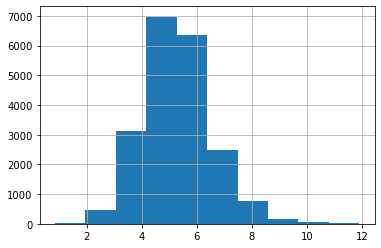

In [40]:
data_df['AveRooms'].hist()

We can have a similar reasoning for the number of people living in a house. Let's check the number of districts, where the AveOccup is greater than 13:

In [41]:
data_df[data_df['AveOccup']>13]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
1039,4.3029,16.0,6.090592,1.121951,4930.0,17.177700,38.42,-120.97,1.21900
3364,5.5179,36.0,5.142857,1.142857,4198.0,599.714286,40.41,-120.51,0.67500
4479,3.5769,41.0,4.940000,1.100000,925.0,18.500000,34.07,-118.16,1.35700
5986,1.8750,52.0,4.500000,1.206349,2688.0,21.333333,34.10,-117.71,2.12500
7164,2.1845,36.0,4.812155,1.110497,2862.0,15.812155,34.06,-118.17,1.23800
8874,9.3370,52.0,7.285714,1.214286,1154.0,41.214286,34.06,-118.45,5.00001
9172,4.2391,5.0,5.123810,0.933333,8733.0,83.171429,34.47,-118.59,1.54600
12104,1.6250,8.0,7.600000,0.950000,1275.0,63.750000,33.97,-117.33,1.62500
13034,6.1359,52.0,8.275862,1.517241,6675.0,230.172414,38.69,-121.15,2.25000
13366,4.2578,36.0,5.258824,1.117647,2886.0,33.952941,33.94,-117.63,1.83300


<AxesSubplot:>

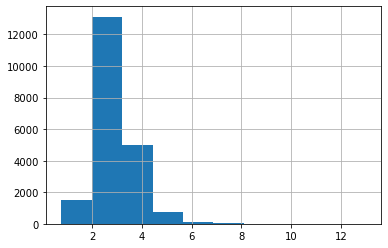

In [42]:
data_df['AveOccup'][data_df['AveOccup']<=13].hist()

Let's have a look at all the feature histograms:

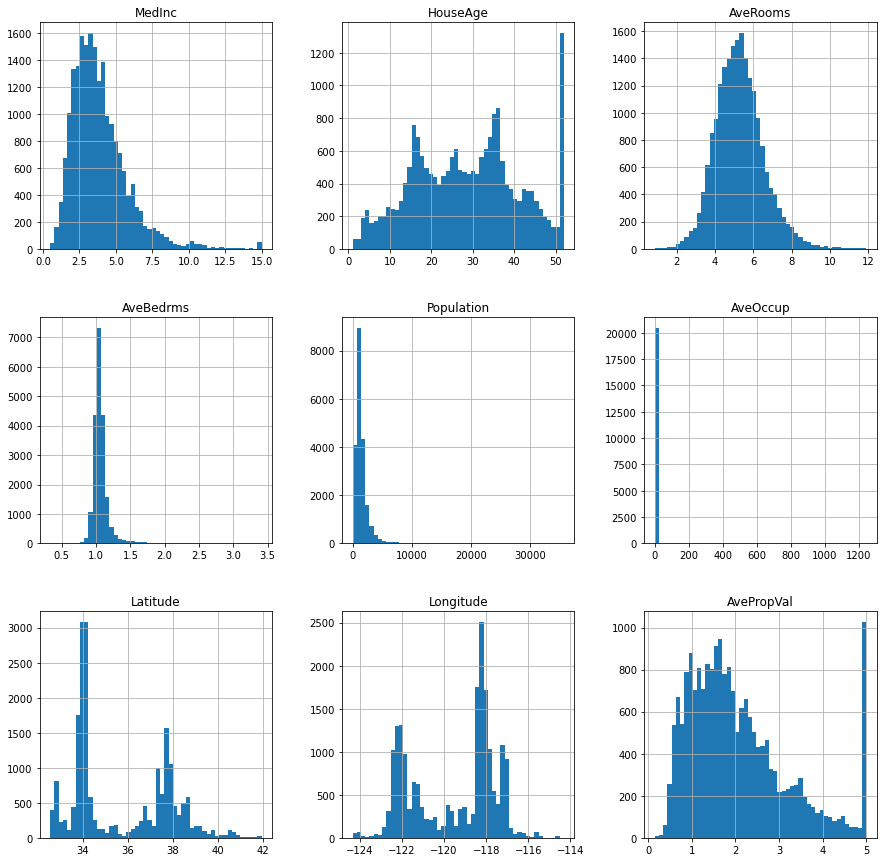

In [43]:
data_df.hist(bins=50, figsize=(15,15))
plt.show()

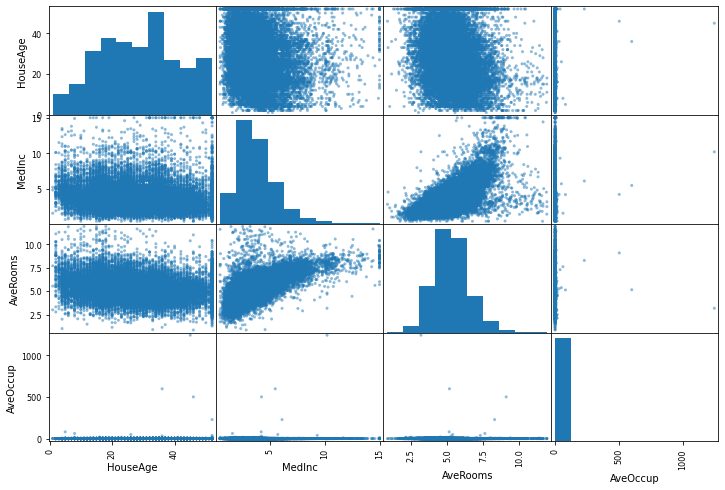

In [44]:
from pandas.plotting import scatter_matrix
attributes = ['HouseAge', 'MedInc',
             'AveRooms', 'AveOccup']
scatter_matrix(data_df[attributes], figsize=(12,8));

In [45]:
data_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<AxesSubplot:xlabel='Population', ylabel='AvePropVal'>

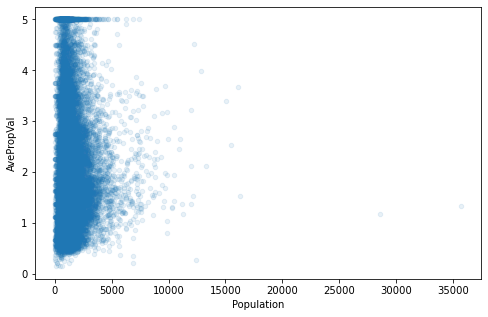

In [50]:
data_df.plot(kind='scatter', x='Population', y='AvePropVal',
             alpha=0.1, figsize=(8,5))

### Splitting the Data

In [51]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(dataset.data,
                             dataset.target,
                             test_size=0.30,
                             random_state=42)

data_train, data_test, targets_train, targets_test = data_sets

### A First Classifier

In [52]:
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(data_train, targets_train)
clf.predict(data_train)

array([2.03631477, 2.02460928, 2.15315216, ..., 1.70455007, 2.31221342,
       2.57457578])

Parameters:
    
- activation{‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default=’relu’
  Activation function for the hidden layer.
  - ‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
  - ‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
  - ‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
  - ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

- solver{‘lbfgs’, ‘sgd’, ‘adam’}, default=’adam’
  The solver for weight optimization.
  - ‘lbfgs’ is an optimizer in the family of quasi-Newton methods.
  - ‘sgd’ refers to stochastic gradient descent.
  - ‘adam’ refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
  
  **Note:** The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.


### Data Preprocessing

#### Removing Outliers

In [53]:
max_ave_rooms = 12
# column with index 2 corresponds to average number of rooms
shape = dataset.data.shape
cleansed_shape = dataset.data[dataset.data[:,2] <= max_ave_rooms].shape
print(shape, cleansed_shape)
n_outliers = shape[0]-cleansed_shape[0]
print(f"Number of outliers, more than {max_ave_rooms} bedrooms: {n_outliers}")

(20640, 8) (20495, 8)
Number of outliers, more than 12 bedrooms: 145


Let us remove all data with an average number of rooms greater than ```max_ave_rooms```:

In [54]:
x = dataset.data[:,2] <= max_ave_rooms  # Boolean array
data = dataset.data[x]
targets = dataset.target[x]
data.shape, targets.shape

((20495, 8), (20495,))

In [55]:
data.shape

(20495, 8)

Before we go on like this, let us have a look at the statistics for each feature:

In [56]:
data_df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvePropVal
count,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000,20495.000000
mean,3.870574,28.715540,5.297038,1.069902,1432.511979,3.074511,35.621918,-119.573349,2.071016
std,1.898052,12.575564,1.274305,0.143758,1132.726950,10.422249,2.130666,2.003646,1.154817
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.750000,32.540000,-124.350000,0.149990
25%,2.562500,18.000000,4.434997,1.005747,793.000000,2.432727,33.930000,-121.800000,1.198000
50%,3.534700,29.000000,5.219585,1.048128,1171.000000,2.823322,34.250000,-118.490000,1.801000
75%,4.744800,37.000000,6.027555,1.098000,1729.000000,3.285983,37.710000,-118.010000,2.652000
max,15.000100,52.000000,11.901869,3.411111,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [57]:
# "MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup", "Latitude", "Longitude"

x = data[:,5] <= 10   # AveOccup
data = data[x]
targets = targets[x]
data.shape, targets.shape

((20459, 8), (20459,))

In [58]:
avebedrms_index = 3

np.min(data[:,3]), np.max(data[:,3])

(0.3333333333333333, 3.411111111111111)

In [59]:
np.max(dataset.data[:3])

2401.0

The outliers for this feature have already disappeared due to the previous cleaning actions.

#### Another try on classification:

The original data:

In [60]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data,
                             targets,
                             test_size=0.30,
                             random_state=42)

data_train, data_test, targets_train, targets_test = data_sets

The cleansed data:

In [61]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(dataset.data,
                             dataset.target,
                             test_size=0.30,
                             random_state=42)

data_train2, data_test2, targets_train2, targets_test2 = data_sets

In [62]:
data.shape

(20459, 8)

In [63]:
data_train.shape, data_train2.shape

((14321, 8), (14448, 8))

In [64]:
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(data_train, targets_train)
print(clf.score(data_train, targets_train))
print(clf.score(data_test, targets_test))

0.6529314309501919
0.6429262961386791


We can see that classifying with uncleansed data gives us slightly worse results:

In [65]:
clf = MLPRegressor(solver='lbfgs',        #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,            # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(10, 2), 
                   activation='logistic', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   random_state=42)
clf.fit(data_train2, targets_train2)
print(clf.score(data_train2, targets_train2))
print(clf.score(data_test2, targets_test2))

0.6497290839847478
0.643381317467951


#### Scaling the Data

As the data varies a lot in magnitude, we can or should scale the data:

In [66]:
from sklearn import preprocessing

data_scaled = preprocessing.scale(data)
data_scaled.shape

(20459, 8)

In [67]:
data_scaled[:5]

array([[ 2.35060892,  0.97741648,  1.32614432, -0.32120816, -0.98212191,
        -0.47819706,  1.06028422, -1.32627682],
       [ 2.33805042, -0.61364072,  0.73967535, -0.68360646,  0.86018141,
        -1.06008696,  1.05089666, -1.32128549],
       [ 1.78716513,  1.85249794,  2.35130642,  0.02519331, -0.82793203,
        -0.15611866,  1.04620287, -1.33126814],
       [ 0.93535084,  1.85249794,  0.40886977,  0.02249278, -0.7729908 ,
        -0.48813255,  1.04620287, -1.33625946],
       [-0.01281562,  1.85249794,  0.77404337,  0.07847414, -0.76678776,
        -0.96657835,  1.04620287, -1.33625946]])

In [68]:
data[:5]

array([[ 8.32520000e+00,  4.10000000e+01,  6.98412698e+00,
         1.02380952e+00,  3.22000000e+02,  2.55555556e+00,
         3.78800000e+01, -1.22230000e+02],
       [ 8.30140000e+00,  2.10000000e+01,  6.23813708e+00,
         9.71880492e-01,  2.40100000e+03,  2.10984183e+00,
         3.78600000e+01, -1.22220000e+02],
       [ 7.25740000e+00,  5.20000000e+01,  8.28813559e+00,
         1.07344633e+00,  4.96000000e+02,  2.80225989e+00,
         3.78500000e+01, -1.22240000e+02],
       [ 5.64310000e+00,  5.20000000e+01,  5.81735160e+00,
         1.07305936e+00,  5.58000000e+02,  2.54794521e+00,
         3.78500000e+01, -1.22250000e+02],
       [ 3.84620000e+00,  5.20000000e+01,  6.28185328e+00,
         1.08108108e+00,  5.65000000e+02,  2.18146718e+00,
         3.78500000e+01, -1.22250000e+02]])

#### Generating Polynomial Features

In [69]:
from sklearn.preprocessing import PolynomialFeatures



Polynomial Features:

PolynomialFeatures does the following: Generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form $[a, b]$, the degree-2 polynomial features are $[1, a, b, a^2, ab, b^2]$.

In [70]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
X

array([[0, 1],
       [2, 3],
       [4, 5]])

In [71]:
poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

If the interaction_only parameter is set to True, only interaction features are produced: features that are products of at most degree distinct input features (so not x[1] ** 2, x[0] * x[2] ** 3, etc.).


In [72]:
poly = PolynomialFeatures(interaction_only=True)
poly.fit_transform(X)

array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

Let's get back to our housing data:

In [73]:
pft = PolynomialFeatures(degree=2)
data_poly = pft.fit_transform(data_scaled)
data_poly
data_poly

array([[ 1.        ,  2.35060892,  0.97741648, ...,  1.12420263,
        -1.40623038,  1.7590102 ],
       [ 1.        ,  2.33805042, -0.61364072, ...,  1.10438378,
        -1.38853451,  1.74579536],
       [ 1.        ,  1.78716513,  1.85249794, ...,  1.09454046,
        -1.39277656,  1.77227486],
       ...,
       [ 1.        , -1.14529647, -0.93185216, ...,  3.19630178,
        -1.46986232,  0.67593593],
       [ 1.        , -1.0570704 , -0.8522993 , ...,  3.19630178,
        -1.5590982 ,  0.7604999 ],
       [ 1.        , -0.78194435, -1.01140502, ...,  3.09639525,
        -1.46427431,  0.69245011]])

### Splitting our Dataset

In [74]:
from sklearn.model_selection import train_test_split
data_sets = train_test_split(data_poly,
                             targets,
                             test_size=0.30,
                             random_state=42)

data_train, data_test, targets_train, targets_test = data_sets

### Creating and Training a Classifier



In [75]:
clf = MLPRegressor(solver='lbfgs',   #  ‘lbfgs’, ‘sgd’, ‘adam’ (default)
                   alpha=1e-5,     # used for regularization, ovoiding overfitting by penalizing large magnitudes
                   hidden_layer_sizes=(5, 2), 
                   activation='relu', # ‘identity’, ‘logistic’, ‘tanh’, ‘relu’ (default)
                   max_iter=10000,
                   early_stopping=True,
                   random_state=42)
clf.fit(data_train, targets_train)
print(clf.score(data_train, targets_train))
print(clf.score(data_test, targets_test))

0.7952528759049259
0.7752743785730409


In [77]:
clf.predict(data_train)

array([2.56172046, 2.35781579, 1.92601089, ..., 2.307256  , 3.44872006,
       2.85340133])

In [78]:
targets_train

array([2.109, 2.257, 1.508, ..., 3.1  , 2.825, 2.42 ])